# Correlaciones de grado!
**¿Existen correlaciones entre el perfil de grado de los nodos de un grafo?** En otros términos, si tomamos dos nodos con perfiles bien distintos, uno con pocos vecinos y otro con muchos vecinos: ¿A qué tipos de nodos estarán conectados estos nodos? Nuevamente, volvemos a grafos de palabras que representan lenguas de Sudamérica. 

## (1) Lenguas de la Américas
### Extraemos las lenguas de América del Sur y de América del Norte desde los datos de Glottolog
### https://glottolog.org/meta/downloads

In [1]:
## usamos pandas para leer .csv

import pandas as pd 

In [2]:
## clasificación por macroárea 

macroarea = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [3]:
## borramos donde no hay datos (NaN)

macroarea.dropna(inplace = True)

In [4]:
## nos quedamos con un dataframe con dos columnas: iso vs macroárea

macroarea = macroarea[['isocodes','macroarea']]

In [5]:
## transformamos los datos en un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['isocodes'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America', 'Australia', 'Papunesia', 'Africa', 'Eurasia', 'North America']}

In [6]:
## ¿cuántas lenguas tenemos?

print('número de lenguas: '+str(len(macroarea.keys())))

número de lenguas: 7690


In [7]:
import zipfile
with zipfile.ZipFile('udhr.zip','r') as zip_ref:
    zip_ref.extractall('udhr')

In [8]:
## de este conjunto de 1208 lenguas, filtramos las que están en el corpus UDHR
## https://www.unicode.org/udhr/index.html

languages={}

for language in list(macroarea.keys()):
    #with open('udhr_' + language + '.txt', 'r', encoding='utf-8') as file:
    try: 
        file = open('udhr/'+'udhr_'+language+'.txt', 'r')  
        language_text=file.read().split('\n')
        languages[language]=[line.strip() for line in language_text]
        languages[language]=[line for line in languages[language] if len(line)>0]
    except FileNotFoundError:
        pass

In [9]:
## nuevo número de lenguas :)

print(len(languages))

362


In [10]:
## mapudungun :)
## solo imprimimos los primeros 10 elementos de la lista

languages['arn'][:10]

['Universal Declaration of Human Rights - Mapudungun',
 '© 1996 – 2009 The Office of the High Commissioner for Human Rights',
 'This plain text version prepared by the “UDHR in Unicode”',
 'project, https://www.unicode.org/udhr.',
 '---',
 'Kom Mapu Fijke Az Tañi Az Mogeleam',
 'Tuwvlzugun',
 '("Preámbulo" pi ta wigka)',
 'Kimnieel fij mapu mew tañi kimgen kvme felen kisugvnew felen xvr kvme mvlen. Tvfaci zugu ñi mvleken mvleyem yamvwvn ka xvr kvme nor felen kom pu reñmawke ce mew.',
 'Gewenonmu yamuwvn, zuamgewenonmu kvme felen, goymagenmu nor felen mvley re jazkvnkawvn: Fey mew mvley xvrvmzugu kom pu ce tañi kvme mogeleam kisuke ñi feyentun mew, kisu ñi rakizuam mew ka ñi wimtun mew ñi mvleal egvn.']

### Descripción del corpus

In [11]:
## dos funciones que permiten "limpiar" los datos con el fin de construir redes.
## la primera tokeniza strings. Usamos como definición de palabra como la cadena de caracteres entre dos espacios en blanco. 
## la segunda (i) elimina símbolos raros, elimina espacios vacíos, elimina números y remueve los encabezados

def tokenize(s):
    return s.split(' ')

def clean(L):
    language=languages[L]
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    language=[list(filter(None, [w.lower().translate(table) for w in tokenize(sentence)])) for sentence in language if len([w.lower() for w in [w.translate(table) for w in tokenize(sentence)]])>0]
    language=[[w for w in s if w!="''"] for s in language] 
    language=[[w for w in s if w!='̃'] for s in language] 
    language=[[w for w in s if not w.isdigit()] for s in language]
    return language[5:]

In [12]:
## aplicamos las funciones anteriores.

clean_languages={}
for language in languages:
    clean_languages[language]=clean(language)

In [13]:
## para cada ejemplo, mostramos cómo queda la primera oración. 

for language in clean_languages.keys():
    print(language, clean_languages[language][0])

abk ['ауаҩытәыҩса', 'изинқәа', 'зегьеицырзеиҧшу', 'адекларациа']
ace ['assalammualaikum', 'meunan', 'ulon', 'kheun', 'wate', 'bie', 'saleum', 'meurumpok', 'gata', 'wa', 'alaikum', 'salam', 'balaih', 'gata', 'kheun', 'geutanyoe', 'taseunyom', 'rumeh', 'lagoina', 'lon', 'puphon', 'lajue', 'meukeusud', 'ulon', 'keunoe', 'ulon', 'tron', 'meurumpok', 'gata', 'lon', 'peutrok', 'haba', 'suai', 'paleng', 'phon', 'peunyataan', 'umum', 'hak‐hak', 'asasi', 'manusia', 'tiep', 'ureung', 'lahee', 'dengon', 'hak‐hak', 'drou', 'kareuna', 'geutanyo', 'bangsa', 'manusia', 'hak‐hak', 'muteulak', 'nyang', 'saban', 'keu', 'barangso', 'jih', 'lon', 'ngon', 'gata', 'droe', 'sama', 'mulia', 'peusyarikatan', 'bangsa‐bangsa', 'pbb', 'kana', '“komitmen”', 'meunan', 'keuh', 'dikheun', 'lee', 'awak', 'lua', 'dijunjong', 'diseu‐on', 'dilindong', 'dipeutheun', 'peunyuloh', 'ureung', 'haroik', 'merdeka', 'pane', '“komitmen”', 'bak', 'awai', 'phon', 'puteh', 'licen', 'lon', 'neulop', 'sion‐on', 'piagam', 'peusyarikata

In [14]:
## contamos palabras 

from collections import Counter

words_entropy={}
words={}
mean_tokens={}
mean_types={}
for language in clean_languages.keys():
    words_entropy[language]=[item for sublist in clean_languages[language] for item in sublist]
    words[language]=[len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])),Counter([item for sublist in clean_languages[language] for item in sublist])]
    mean_tokens[language]=len([item for sublist in clean_languages[language] for item in sublist])
    mean_types[language]=len(set([item for sublist in clean_languages[language] for item in sublist]))
    print(language,len(clean_languages[language]),len([item for sublist in clean_languages[language] for item in sublist]),len(set([item for sublist in clean_languages[language] for item in sublist])))

abk 91 1294 750
ace 93 1906 709
acu 92 1676 559
ada 93 2882 344
ady 92 1195 716
afr 91 1656 470
agr 90 1811 827
ajg 92 2031 571
amc 87 1496 672
amr 93 1407 421
qva 92 1715 762
amh 82 83 83
ami 92 1546 407
njo 103 1396 513
arl 94 1973 530
qxu 94 1124 542
cni 92 1305 515
prq 75 626 258
aii 89 1130 503
ast 93 1871 643
kwi 202 1294 733
quy 93 1279 645
bba 91 1907 477
ban 94 1711 595
rmn 93 1665 641
bam 91 1632 482
bax 91 2254 507
bci 90 2892 439
bfa 82 2011 433
eus 93 1348 669
bel 93 1640 742
bem 90 1362 658
ben 95 1383 638
btb 90 1160 371
bho 91 1703 536
bin 104 2784 478
bis 91 2310 344
qug 239 1409 702
boa 96 1567 704
gax 94 1410 557
nku 88 1074 228
bre 94 1845 586
bug 94 1752 614
bul 91 1737 618
mya 91 1188 865
qvc 90 1153 599
qud 91 933 456
cbu 91 1290 574
cot 94 1532 715
hns 94 2221 490
cbr 92 2204 542
cbs 76 626 258
cat 92 1800 570
ceb 91 1868 482
ayr 91 925 610
dga 93 2552 356
knc 102 1320 692
khm 92 549 462
ckb 90 1644 602
maz 91 1544 310
tzm 92 1783 647
ccp 94 1414 680
cha 92 1915

In [15]:
type_token = {}

for language in clean_languages.keys():
    type_token[language]=mean_types[language]/float(mean_tokens[language])

In [16]:
type_token

{'abk': 0.5795981452859351,
 'ace': 0.3719832109129066,
 'acu': 0.33353221957040574,
 'ada': 0.1193615544760583,
 'ady': 0.599163179916318,
 'afr': 0.28381642512077293,
 'agr': 0.45665378244064053,
 'ajg': 0.2811422944362383,
 'amc': 0.44919786096256686,
 'amr': 0.2992181947405828,
 'qva': 0.4443148688046647,
 'amh': 1.0,
 'ami': 0.2632600258732212,
 'njo': 0.3674785100286533,
 'arl': 0.26862645717181954,
 'qxu': 0.4822064056939502,
 'cni': 0.3946360153256705,
 'prq': 0.41214057507987223,
 'aii': 0.4451327433628319,
 'ast': 0.3436664885088188,
 'kwi': 0.5664605873261206,
 'quy': 0.5043002345582487,
 'bba': 0.25013109596224437,
 'ban': 0.347749853886616,
 'rmn': 0.384984984984985,
 'bam': 0.29534313725490197,
 'bax': 0.22493345164152617,
 'bci': 0.15179806362378975,
 'bfa': 0.21531576330183988,
 'eus': 0.49629080118694363,
 'bel': 0.4524390243902439,
 'bem': 0.4831130690161527,
 'ben': 0.4613159797541576,
 'btb': 0.31982758620689655,
 'bho': 0.3147386964180857,
 'bin': 0.171695402298850

## (2) Grafos de palabras

In [17]:
## famosa librería de redes
import networkx as nx

In [18]:
## grafos: para cada texto, recorremos sus oraciones y en cada una buscamos pares de palabras adyacentes

def GoW(text_clean,radius=2):
    ## partimos con un grafo vacío (sin nodos o aristas)
    G=nx.Graph()
    ## recorremos las oraciones
    for sentence in text_clean:
        ## si tiene al menos dos palabras
        if len(sentence)>1:
            ## en "pairs" guardamos momentáneamente los pares de palabras adyacentes
            pairs=[]
            ## usamos un radio, que fijamos inicialmente en 1
            for r in list(range(1,radius+1)):
                ## usamos zip para crear bigramas
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                ## si una arista no está la agregamos
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
    
    return G

In [19]:
## calculamos los grafos
import numpy as np

#graphs={}
#graphs_random={}
#
#for language in languages.keys():
#    if type_token[language]<1:
#        G=GoW(clean_languages[language])
#        if nx.is_connected(G):
#            #print(language)
#            graphs[language]=G
#        
#            random_list=[]
#            for i in range(10):
#                #print(language)
#                G0 = G.copy()
#                degree = np.mean(list(dict(G0.degree()).values()))
#                p_erdos = degree/(len(G0)-1)
#                G0 = nx.erdos_renyi_graph(len(G0),p_erdos)
#                random_list.append(G0)
#            graphs_random[language]=random_list

In [20]:
import pickle

#pickle.dump(graphs,open('graphs.p','wb'))

In [21]:
graphs = pickle.load(open('graphs.p','rb'))

In [22]:
len(graphs)

223

In [23]:
#pickle.dump(graphs_random,open('graphs_random.p','wb'))

In [24]:
graphs_random = pickle.load(open('graphs_random.p','rb'))

In [25]:
len(graphs_random)

223

## (3) Familias lingüísticas
Extraemos de Glottolog la información de las familias lingüísticas de las Américas. Para acceder automáticamente a esa información, usamos la librería lang2vec https://github.com/antonisa/lang2vec

In [26]:
import pickle

families_languages = pickle.load(open('families_languages.p','rb'))

In [27]:
## familias lingüísticas

family = {key:families_languages[key][0][2:] for key in families_languages.keys() if len(families_languages[key])>0}

In [28]:
#family

In [29]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(family.items()):
    v[value].append(key)

In [30]:
v = dict(v)

In [31]:
#v

## (4) Correlaciones de grado! 

In [32]:
A = {language:nx.degree_pearson_correlation_coefficient(graphs[language]) for language in graphs.keys()}

In [33]:
import numpy as np

A_random = {language:np.mean([nx.degree_pearson_correlation_coefficient(g) for g in graphs_random[language]]) for language in graphs_random.keys()}

In [34]:
len(A),len(A_random)

(223, 223)

In [35]:
ratio = {language:A[language]/A_random[language] for language in A.keys()}

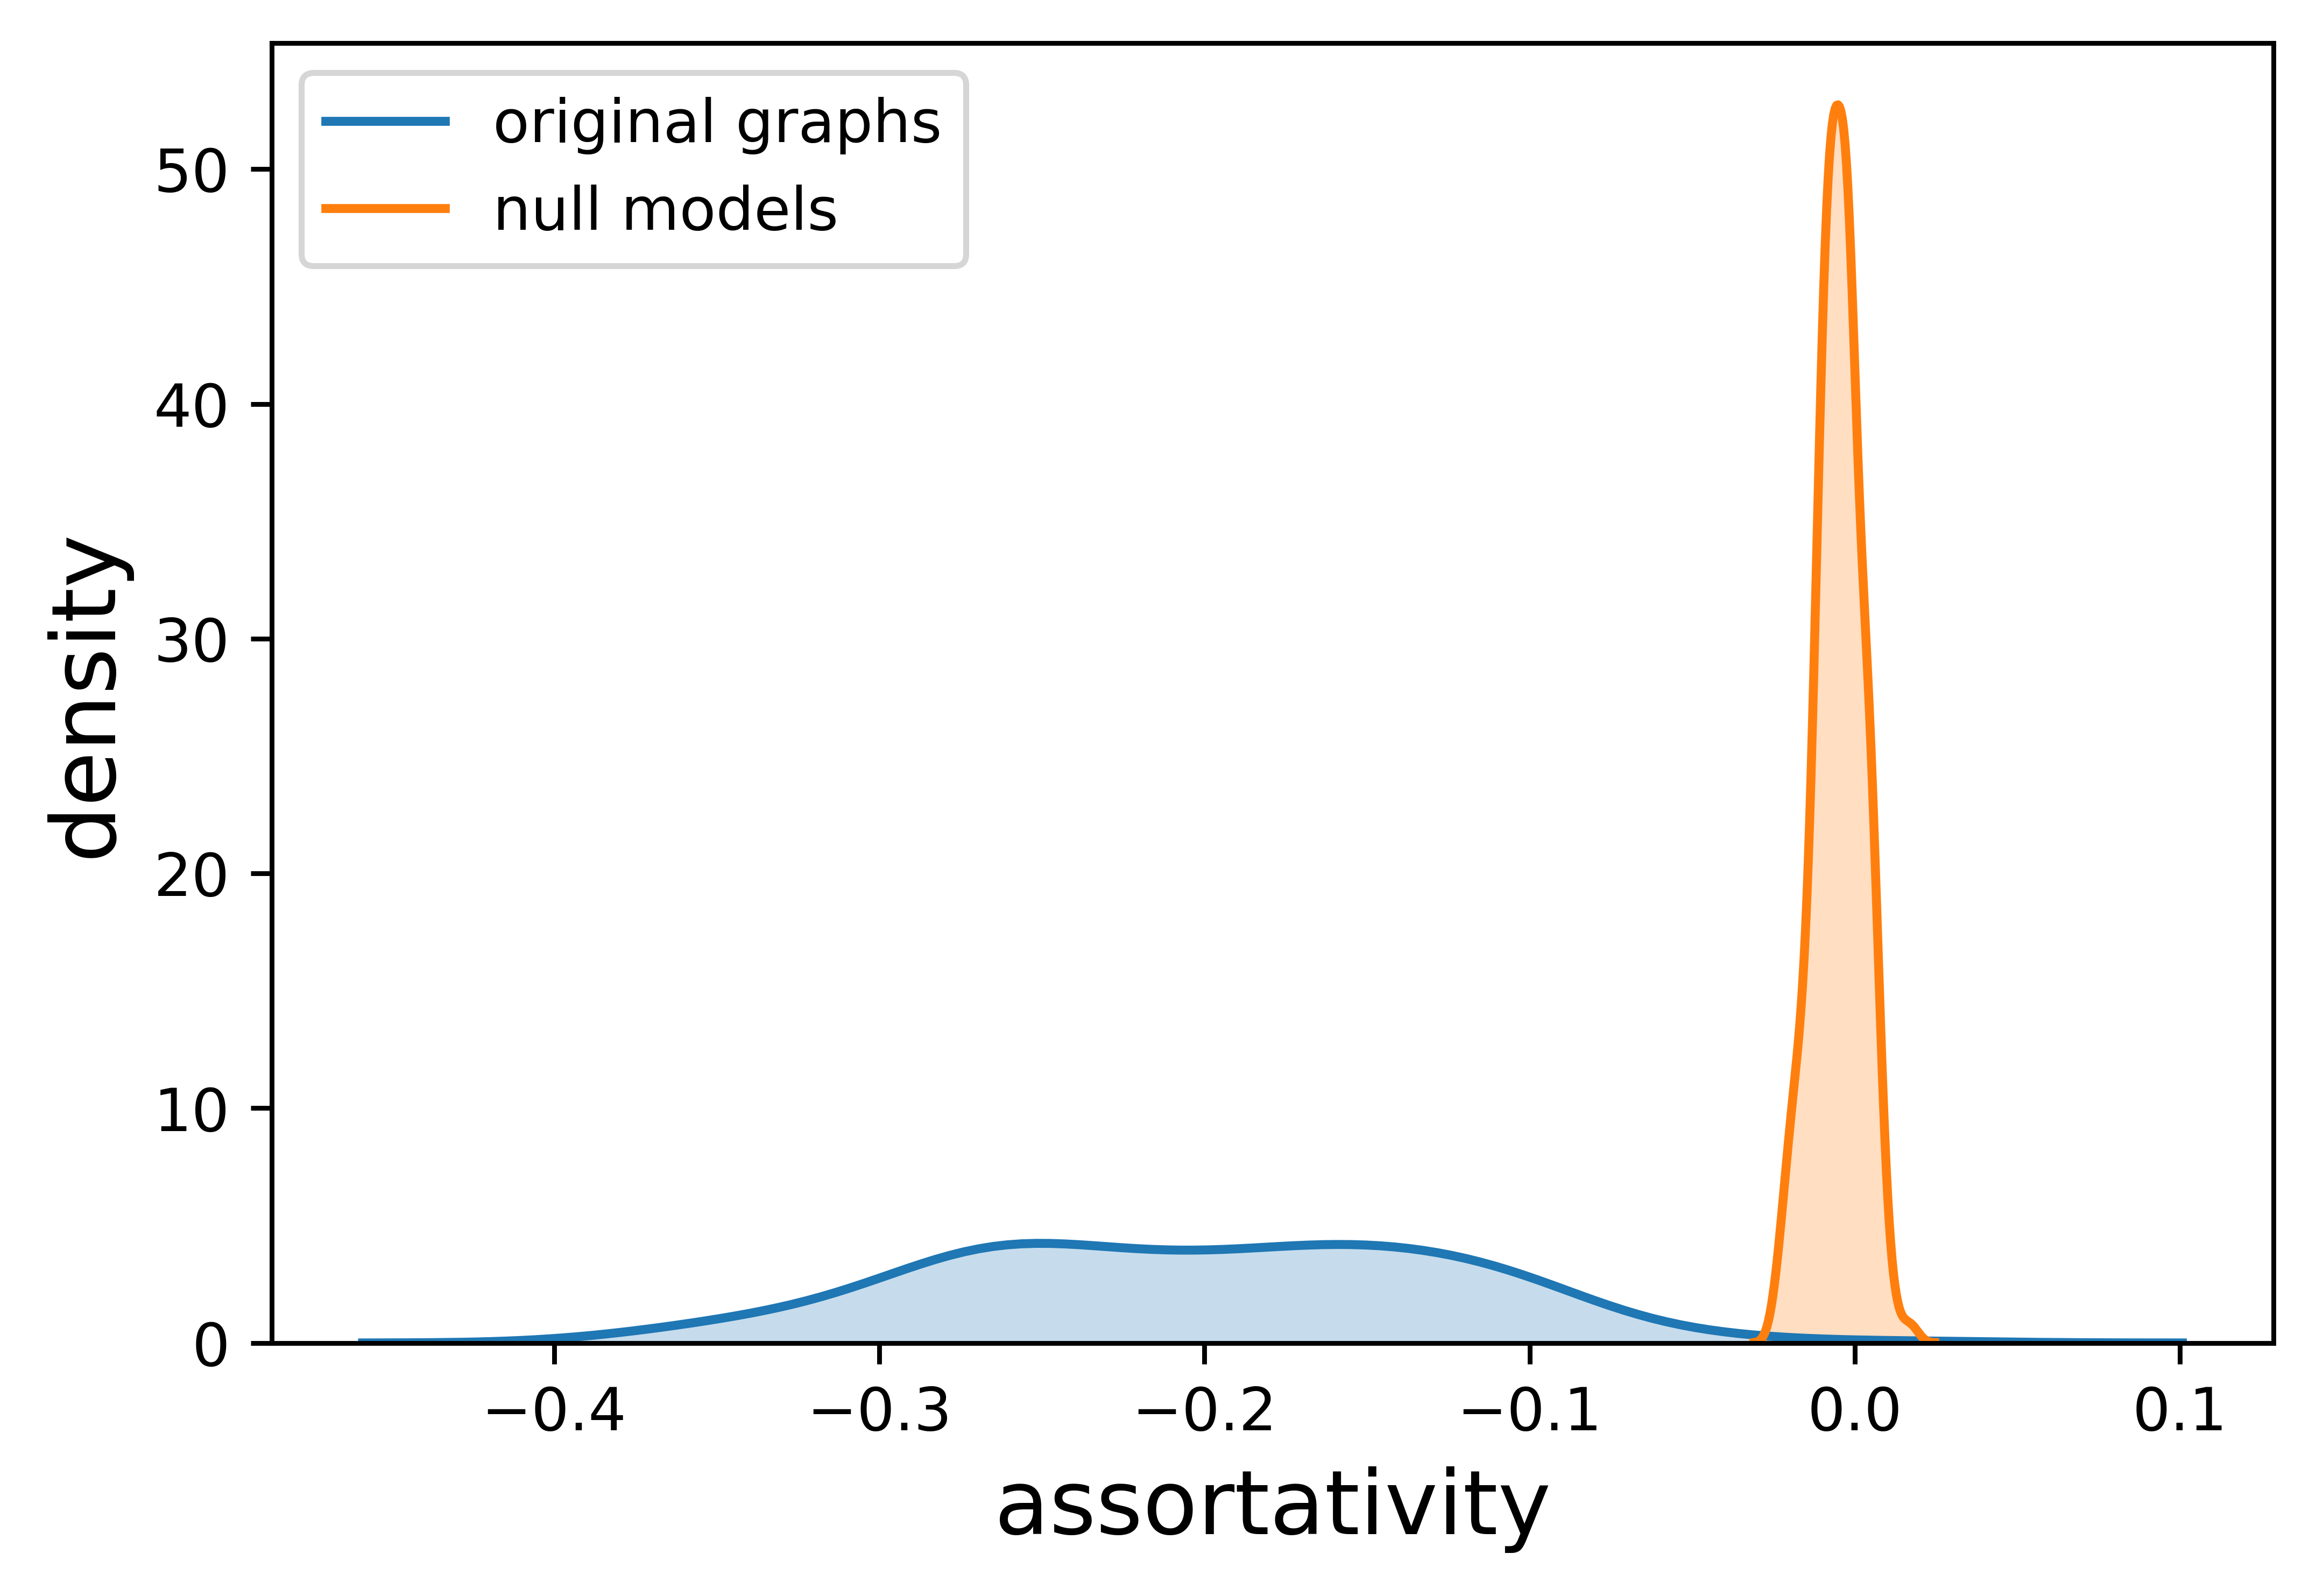

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(dpi=800)

sns.kdeplot(list(A.values()),shade=True,label=r'original graphs')
sns.kdeplot(list(A_random.values()),shade=True,label='null models')

plt.ylabel(r'density',fontsize=15)
plt.xlabel(r'assortativity',fontsize=15)
plt.savefig('assortativity.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.rcParams.update({'font.size': 10})
plt.show()